In [1]:

%%javascript

window.scroll_flag = true
window.scroll_exit = false
window.scroll_delay = 100

$(".output_scroll").each(function() {
    $(this)[0].scrollTop = $(this)[0].scrollHeight;
});

function callScrollToBottom() {
    setTimeout(scrollToBottom, window.scroll_delay);
}

function scrollToBottom() {
    if (window.scroll_exit) {
        return;
    }
    if (!window.scroll_flag) {
        callScrollToBottom();
        return;
    };
    
    $(".output_scroll").each(function() {
        if (!$(this).attr('scroll_checkbox')){
            window.scroll_flag = true;
            $(this).attr('scroll_checkbox',true);
            var div = document.createElement('div');
            var checkbox = document.createElement('input');
            checkbox.type = "checkbox";
            checkbox.onclick = function(){window.scroll_flag = checkbox.checked}
            checkbox.checked = "checked"
            div.append("Auto-Scroll-To-Bottom: ");
            div.append(checkbox);
            $(this).parent().before(div);
        }
        
        $(this)[0].scrollTop = $(this)[0].scrollHeight;
    });
    callScrollToBottom();
}
scrollToBottom();

<IPython.core.display.Javascript object>

In [5]:
#import all relevant packages
import tensorflow as tf
import pathlib
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as interp
import keras 
from keras import layers
import hickle as hkl
from keras.callbacks import History 
history = History()
import time

In [6]:
#import the dataset in hkl format
dataset = hkl.load('datasetshort.hkl')
np.shape(dataset) #check shape

(12000, 6, 1000)

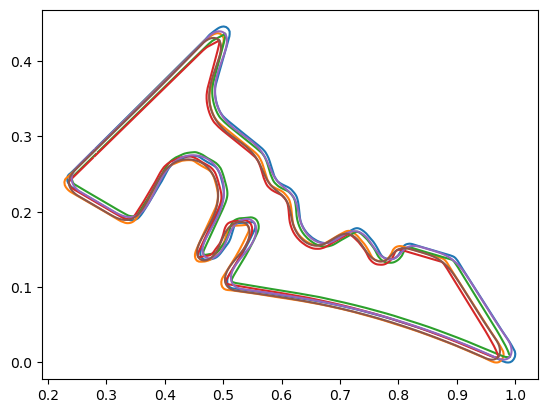

In [9]:
n = 25 #check that the dataset has data in it
for i in [0,2,4]:
        plt.plot(dataset[n,i],dataset[n,i+1])
        plt.plot(dataset[n+1200,i],dataset[n+1200,i+1])

In [10]:
/#check that no datapoints are 0
for i in range(25):
    for j in range(6):
        if dataset[i,j].any()<0 & dataset[i,j].any()>1:
            print (dataset[i,j] + "NOT OK")
else:
            print("Data OK")

Data OK


In [12]:
X = dataset[:,0:4]
Y = dataset[:,4:6]
print (np.shape(X),np.shape(Y)) #split the dataset

(12000, 4, 1000) (12000, 2, 1000)


In [14]:
from sklearn.model_selection import train_test_split
[X_train,X_test,y_train,y_test]=train_test_split(X,Y,test_size=0.2,random_state=100)
for i in [X_train,X_test,y_train,y_test]:
    print (np.shape(i)) #split the dataset into train and test data

(9600, 4, 1000)
(2400, 4, 1000)
(9600, 2, 1000)
(2400, 2, 1000)


In [16]:
start = time.time() #start the timer for training
#define the step and depth of the ANN architecture
step = 500
depth = 500
#define the layers starting bby the input
inputs = keras.Input(shape=(4,1000))
x = layers.Flatten()(inputs) #flatten the data
#loop for defining the encoder layers
n = 4000-step
neurons = np.linspace(4000-step,depth+step,int((4000-(depth))/(step))-1)
for n in neurons:
    x = layers.Dense(n, activation='relu')(x)
x = layers.Dense(depth, activation = 'sigmoid')(x)
#loop for defining the decoding layers
neuronsr = np.linspace(depth+step,2000-step,int((2000-(depth))/(step))-1)
for n in neuronsr:
    x = layers.Dense(n, activation='relu')(x)
x = layers.Dense(2000, activation = 'sigmoid')(x) #last layer with sigmoid activation function
#define the output layer as a reshape
outputs = layers.Reshape((2,1000))(x)
#compile the model
model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
      loss=tf.keras.losses.MeanAbsoluteError(),
      metrics=[tf.keras.metrics.MeanAbsoluteError()],run_eagerly=True)
model.summary()
#start training
model_ = model.fit(X_train,y_train,batch_size=120,epochs=5000,callbacks=[history])
#show the parameters at the end of training
print ("depth :",depth) 
print ("step :", step)
#stop the timer
end = time.time()
#calculate the training time
deltat = end-start
print("elapsed time: ",deltat)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 1000)]         0         
                                                                 
 flatten_1 (Flatten)         (None, 4000)              0         
                                                                 
 dense_8 (Dense)             (None, 3500)              14003500  
                                                                 
 dense_9 (Dense)             (None, 3000)              10503000  
                                                                 
 dense_10 (Dense)            (None, 2500)              7502500   
                                                                 
 dense_11 (Dense)            (None, 2000)              5002000   
                                                                 
 dense_12 (Dense)            (None, 1500)              3001

Epoch 57/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 58/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0129 - mean_absolute_error: 0.0129
Epoch 59/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 60/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0118 - mean_absolute_error: 0.0118
Epoch 61/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0121 - mean_absolute_error: 0.0121
Epoch 62/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0115 - mean_absolute_error: 0.0115
Epoch 63/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0114 - mean_absolute_error: 0.0114
Epoch 64/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0113 - mean_absolute_error: 0.0113
Epoch 65/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0114 - mean_absolu

Epoch 201/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 202/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 203/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0062 - mean_absolute_error: 0.0062
Epoch 204/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0058 - mean_absolute_error: 0.0058
Epoch 205/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0068 - mean_absolute_error: 0.0068
Epoch 206/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0110 - mean_absolute_error: 0.0110
Epoch 207/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0067 - mean_absolute_error: 0.0067
Epoch 208/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0065 - mean_absolute_error: 0.0065
Epoch 209/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0061 - me

Epoch 344/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 345/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 346/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 347/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0049 - mean_absolute_error: 0.0049
Epoch 348/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 349/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0052 - mean_absolute_error: 0.0052
Epoch 350/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0122 - mean_absolute_error: 0.0122
Epoch 351/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0054 - mean_absolute_error: 0.0054
Epoch 352/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0052 - me

Epoch 487/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 488/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 489/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0084 - mean_absolute_error: 0.0084
Epoch 490/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 491/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0046 - mean_absolute_error: 0.0046
Epoch 492/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 493/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0051 - mean_absolute_error: 0.0051
Epoch 494/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 495/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0045 - me

Epoch 630/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0043 - mean_absolute_error: 0.0043
Epoch 631/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0042 - mean_absolute_error: 0.0042
Epoch 632/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0102 - mean_absolute_error: 0.0102
Epoch 633/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0055 - mean_absolute_error: 0.0055
Epoch 634/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0045 - mean_absolute_error: 0.0045
Epoch 635/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0044 - mean_absolute_error: 0.0044
Epoch 636/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0047 - mean_absolute_error: 0.0047
Epoch 637/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0041 - mean_absolute_error: 0.0041
Epoch 638/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0039 - me

Epoch 773/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 774/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 775/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 776/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 777/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 778/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 779/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0040 - mean_absolute_error: 0.0040
Epoch 780/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 781/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0041 - me

Epoch 916/5000
80/80 [==============================] - 4s 54ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 917/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 918/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 919/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 920/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0039 - mean_absolute_error: 0.0039
Epoch 921/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 922/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 923/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 924/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0039 - me

80/80 [==============================] - 4s 46ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 1059/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 1060/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 1061/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 1062/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 1063/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 1064/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 1065/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 1066/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0039 - mean_abso

80/80 [==============================] - 4s 48ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 1201/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 1202/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 1203/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1204/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 1205/5000
80/80 [==============================] - 4s 53ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 1206/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 1207/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 1208/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0034 - mean_abso

80/80 [==============================] - 4s 50ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 1343/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 1344/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0035 - mean_absolute_error: 0.0035
Epoch 1345/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 1346/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 1347/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 1348/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 1349/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1350/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0034 - mean_abso

80/80 [==============================] - 4s 46ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 1485/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 1486/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1487/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1488/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1489/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1490/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0034 - mean_absolute_error: 0.0034
Epoch 1491/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1492/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0032 - mean_abso

80/80 [==============================] - 4s 49ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 1627/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1628/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1629/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1630/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1631/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1632/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1633/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1634/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0030 - mean_abso

80/80 [==============================] - 4s 46ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1769/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 1770/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0099 - mean_absolute_error: 0.0099
Epoch 1771/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0048 - mean_absolute_error: 0.0048
Epoch 1772/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 1773/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 1774/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1775/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1776/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0032 - mean_abso

80/80 [==============================] - 4s 48ms/step - loss: 0.0033 - mean_absolute_error: 0.0033
Epoch 1911/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1912/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1913/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1914/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 1915/5000
80/80 [==============================] - 4s 54ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 1916/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 1917/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 1918/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0030 - mean_abso

80/80 [==============================] - 4s 46ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2053/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 2054/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 2055/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2056/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2057/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2058/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2059/5000
80/80 [==============================] - 4s 53ms/step - loss: 0.0031 - mean_absolute_error: 0.0031
Epoch 2060/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0028 - mean_abso

80/80 [==============================] - 4s 50ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2195/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2196/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 2197/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2198/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2199/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2200/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2201/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 2202/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0029 - mean_abso

80/80 [==============================] - 4s 46ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2337/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0032 - mean_absolute_error: 0.0032
Epoch 2338/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2339/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2340/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0030 - mean_absolute_error: 0.0030
Epoch 2341/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 2342/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2343/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0081 - mean_absolute_error: 0.0081
Epoch 2344/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0039 - mean_abso

80/80 [==============================] - 4s 50ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2479/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2480/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2481/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2482/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2483/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2484/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2485/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2486/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0027 - mean_abso

80/80 [==============================] - 4s 46ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2621/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 2622/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2623/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2624/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 2625/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 2626/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0083 - mean_absolute_error: 0.0083
Epoch 2627/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0038 - mean_absolute_error: 0.0038
Epoch 2628/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0030 - mean_abso

80/80 [==============================] - 4s 51ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2763/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2764/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2765/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 2766/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 2767/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2768/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 2769/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 2770/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0026 - mean_abso

80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 2905/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 2906/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 2907/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 2908/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 2909/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2910/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 2911/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 2912/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_abso

80/80 [==============================] - 4s 52ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 3047/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3048/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3049/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3050/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3051/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 3052/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3053/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3054/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0026 - mean_abso

80/80 [==============================] - 5s 61ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 3189/5000
80/80 [==============================] - 6s 74ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3190/5000
80/80 [==============================] - 5s 58ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3191/5000
80/80 [==============================] - 6s 81ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3192/5000
80/80 [==============================] - 4s 53ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3193/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3194/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3195/5000
80/80 [==============================] - 5s 63ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3196/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_abso

80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3331/5000
80/80 [==============================] - 4s 53ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3332/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3333/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3334/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3335/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3336/5000
80/80 [==============================] - 4s 47ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3337/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3338/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_abso

80/80 [==============================] - 4s 46ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3473/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3474/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3475/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3476/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 3477/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3478/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3479/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3480/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_abso

80/80 [==============================] - 4s 46ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3615/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3616/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3617/5000
80/80 [==============================] - 4s 53ms/step - loss: 0.0059 - mean_absolute_error: 0.0059
Epoch 3618/5000
80/80 [==============================] - 4s 45ms/step - loss: 0.0036 - mean_absolute_error: 0.0036
Epoch 3619/5000
80/80 [==============================] - 4s 45ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 3620/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0029 - mean_absolute_error: 0.0029
Epoch 3621/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 3622/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0028 - mean_abso

80/80 [==============================] - 4s 47ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3757/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3758/5000
80/80 [==============================] - 4s 48ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3759/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3760/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3761/5000
80/80 [==============================] - 4s 46ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3762/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3763/5000
80/80 [==============================] - 4s 55ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3764/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_abso

80/80 [==============================] - 4s 51ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3899/5000
80/80 [==============================] - 4s 55ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3900/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 3901/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3902/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3903/5000
80/80 [==============================] - 4s 53ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 3904/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 3905/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 3906/5000
80/80 [==============================] - 5s 61ms/step - loss: 0.0027 - mean_abso

80/80 [==============================] - 4s 49ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 4041/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4042/5000
80/80 [==============================] - 4s 55ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4043/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4044/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 4045/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4046/5000
80/80 [==============================] - 4s 55ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4047/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4048/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0026 - mean_abso

80/80 [==============================] - 4s 50ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4183/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 4184/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4185/5000
80/80 [==============================] - 4s 56ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4186/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4187/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 4188/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4189/5000
80/80 [==============================] - 4s 56ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4190/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0025 - mean_abso

80/80 [==============================] - 4s 53ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 4325/5000
80/80 [==============================] - 4s 53ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4326/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4327/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4328/5000
80/80 [==============================] - 4s 53ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4329/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0080 - mean_absolute_error: 0.0080
Epoch 4330/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0037 - mean_absolute_error: 0.0037
Epoch 4331/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0028 - mean_absolute_error: 0.0028
Epoch 4332/5000
80/80 [==============================] - 4s 54ms/step - loss: 0.0030 - mean_abso

80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4467/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4468/5000
80/80 [==============================] - 4s 55ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4469/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4470/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 4471/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4472/5000
80/80 [==============================] - 4s 55ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4473/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4474/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0026 - mean_abso

80/80 [==============================] - 4s 50ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4609/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4610/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4611/5000
80/80 [==============================] - 4s 56ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4612/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0027 - mean_absolute_error: 0.0027
Epoch 4613/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4614/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4615/5000
80/80 [==============================] - 5s 57ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4616/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0024 - mean_abso

80/80 [==============================] - 4s 54ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4751/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4752/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4753/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4754/5000
80/80 [==============================] - 4s 53ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4755/5000
80/80 [==============================] - 4s 52ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4756/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4757/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4758/5000
80/80 [==============================] - 4s 55ms/step - loss: 0.0025 - mean_abso

80/80 [==============================] - 4s 54ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4893/5000
80/80 [==============================] - 4s 51ms/step - loss: 0.0024 - mean_absolute_error: 0.0024
Epoch 4894/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4895/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4896/5000
80/80 [==============================] - 5s 57ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 4897/5000
80/80 [==============================] - 4s 50ms/step - loss: 0.0026 - mean_absolute_error: 0.0026
Epoch 4898/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4899/5000
80/80 [==============================] - 4s 49ms/step - loss: 0.0025 - mean_absolute_error: 0.0025
Epoch 4900/5000
80/80 [==============================] - 4s 56ms/step - loss: 0.0024 - mean_abso

In [17]:
model.save('model_v4.h5') #save the model